In [8]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os
from langchain_huggingface import HuggingFaceEmbeddings

load_dotenv

<function dotenv.main.load_dotenv(dotenv_path: Union[str, ForwardRef('os.PathLike[str]'), NoneType] = None, stream: Optional[IO[str]] = None, verbose: bool = False, override: bool = False, interpolate: bool = True, encoding: Optional[str] = 'utf-8') -> bool>

In [9]:
GROK_api_key = os.getenv("GROK_API_KEY")
HUGGING_FACE_TOKEN = os.getenv("HUGGING_FACE_TOKEN")

Embedding model

In [10]:
embedding_model = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en", model_kwargs={"device": "cpu"})

len(embedding_model.embed_query("Hello"))

c:\miniconda\envs\agenticvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\miniconda\envs\agenticvenv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Bharath\.cache\huggingface\hub\models--BAAI--bge-small-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, se

384

Model

In [4]:
model = ChatGroq(temperature=0, model="gemma2-9b-it", groq_api_key=GROK_api_key)

In [6]:
print(model.invoke("Hello").content)

Hello! 👋  How can I help you today? 😊



Vectore Store

In [ ]:
from langchain_community.document_loaders import PDFPlumberLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [13]:
loader = DirectoryLoader("E:/Agentic AI/Agentic-AI/25-05-2025/DataIngestion", glob="**/*.pdf")

In [16]:
docs = loader.load()

Matplotlib is building the font cache; this may take a moment.


In [18]:
print(docs[0].page_content)

2.14

2.14A

GAME OF THRONES #302 MASTER DOCUMENT Language Translations

David J. Peterson

Revised 8/7/12

KEY:

(Title of Associated .mp3 File)

CHARACTER NAME

English dialogue as written.

TRANSLATION

Official transcription for closed captioning and subtitles.

PHONETIC fo-NE-tik REN-dur-ing Literal translation.

-------------------------------------------------------------------

EXT. ASTAPOR - APPROACH TO PRESENTATION AREA - DAY

2.14

(s3e2sc2-14_1.mp3)

KRAZNYS Tell the Westerosi whore that these Unsullied have been standing here a day and a night, with no food or water.

TRANSLATION

Ivetra ji live Vesterozia sko bezi Dovoghedhi kizir jortis me tovi si me banti, do havor dore jedhar dos.

PHONETIC i-ve-TRA ji LI-ve ves-te-ro-ZI-a sko BE-zi do-vo-GHE-dhi KI-zir JOR- tis me TO-vi si me BAN-ti, do HA-vor DO-re JE-dhar dos. Tell the whore Westerosi that these Unsullied here have stood a day and a night, no food nor water with.

----------------------------------------------------

In [19]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)

In [20]:
chunks = text_splitter.split_documents(docs)

In [22]:
len(chunks)

747

In [23]:
vector_store = Chroma.from_documents(chunks, embedding_model)

Retriever

In [25]:
retriever = vector_store.as_retriever(search_kwargs={"k": 3})

retriever.invoke("What did John Snow do to the Night King?")

[Document(metadata={'source': 'E:\\Agentic AI\\Agentic-AI\\25-05-2025\\DataIngestion\\game_of_thrones_master_dialogue_s3s8.pdf'}, page_content='Yes. After (the) second of-death of-Khal of-hers. But you not. You traveled across (the) world. That is-forbidden. (beat) All khalasars already returned to-city ancient because-of Khalar Vezhven, that meet they and-will-discuss plans their for winter next thereat. They will-decide and which cities will-be sacked, and which tribes will- be enslaved, and which will-be destroyed. And now they-must decide (the) fate of-widow with hair silver of-Khal Drogo. (beat) If (the) stars are-charging'),
 Document(metadata={'source': 'E:\\Agentic AI\\Agentic-AI\\25-05-2025\\DataIngestion\\game_of_thrones_master_dialogue_s3s8.pdf'}, page_content='Yes. Immediately after the death of their khal. But you did not. You went out into the world. That is forbidden. (beat) All the khalasars have returned to the ancient city for the Khalar Vezhven, where they will meet 

Pydantic

In [26]:
import operator
from pydantic import BaseModel,Field
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage

In [27]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [28]:
from langchain.output_parsers import PydanticOutputParser

parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [30]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


In [31]:
'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [32]:
class Agentstate(TypedDict):
    message: Annotated[Sequence[BaseMessage], operator.add]

In [33]:
def function_1(state: Agentstate):
    pass

def function_2(state: Agentstate):
    pass

def function_3(state: Agentstate):
    pass

def router(state: Agentstate):   ## for conditional edges
    pass

In [56]:
from langgraph.graph import StateGraph, END

workflow = StateGraph(Agentstate)

Adding Conditional Edges and creating worlflow

In [57]:
workflow.add_node("Supervisor", function_1)

In [58]:
workflow.add_node("RAG", function_2)

In [59]:
workflow.add_node("LLM", function_3)

In [60]:
workflow.set_entry_point("Supervisor")

In [61]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG call": "RAG",
        "LLM call": "LLM",
    }
)

In [62]:
workflow.add_edge("RAG", END)
workflow.add_edge("LLM", END)

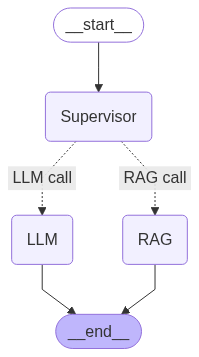

In [63]:
workflow.compile()